In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

## Forest cover type data

https://archive.ics.uci.edu/ml/datasets/covertype

https://www.kaggle.com/uciml/forest-cover-type-dataset

In [3]:
covertype_df = pd.read_csv('/users/linggeli/downloads/covtype.csv')
print(covertype_df.shape)

(581012, 55)


In [4]:
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
covertype_subset = covertype_df.iloc[0:500000:100, :]  # take a subset of the data to save time
print(covertype_subset.shape)

(5000, 55)


## Tutorials and resources

Numpy tutorial: http://cs231n.github.io/python-numpy-tutorial/

Matplotlib tutorial: http://scipy-lectures.org/intro/matplotlib/matplotlib.html

Pandas introduction: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

Seaborn package: https://seaborn.pydata.org/index.html

Python style guide: https://pep8.org/

### First, we want to know the distribution of different cover types. Cover type is a categorical variable with indicator values from 1 to 7. We can visualize the distribution with a bar plot.

In [6]:
count = np.zeros(7)
for i in range(7):
    count[i] = np.sum(covertype_subset['Cover_Type'] == i + 1)  # count the number of instances for each cover type

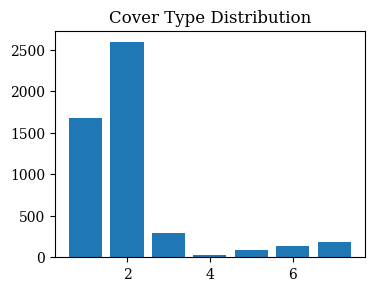

In [32]:
fig = plt.figure(figsize=(4, 3), dpi=100)
plt.bar(np.arange(1, 8), count)
plt.title('Cover Type Distribution')
plt.show()

### *Exercise 0. One-hot encode cover type.*

In [8]:
# create numpy array of appropriate shape filled with zeros
# go through each row of covertype dataframe
# set the corresponding position in the numpy array to one

### Then we want to see distributions and relationships between other variables.

In [9]:
elevation = covertype_subset['Elevation'].values  # turn dataframe column to numpy array
print(np.mean(elevation))  # calculate summary statistics with numpy
print(np.std(elevation))
print(np.median(elevation))

2951.1754
276.197305263538
2988.0


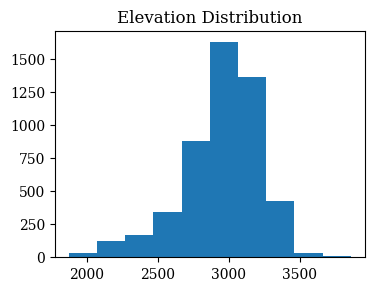

In [33]:
fig = plt.figure(figsize=(4, 3), dpi=100)
plt.hist(elevation)
plt.title('Elevation Distribution')
plt.show()

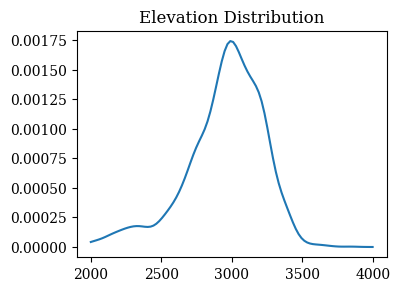

In [34]:
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(4, 3), dpi=100)
density = gaussian_kde(elevation)
xs = np.linspace(2000, 4000, 100)
density._compute_covariance()
plt.plot(xs, density(xs))
plt.title('Elevation Distribution')
plt.show()

### Side-by-side plots allow us to see the relationship between a continuous variable and a categorical variable.

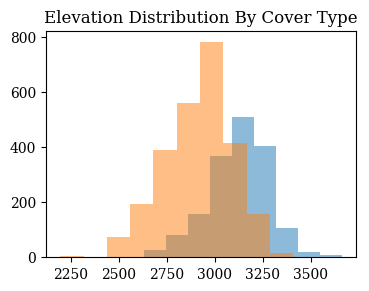

In [35]:
covertype = covertype_subset['Cover_Type'].values

fig = plt.figure(figsize=(4, 3), dpi=100)
plt.hist(elevation[covertype == 1], alpha=0.5)
plt.hist(elevation[covertype == 2], alpha=0.5)
plt.title('Elevation Distribution By Cover Type')
plt.show()

### For two continuous variables, we can use scatter plots.

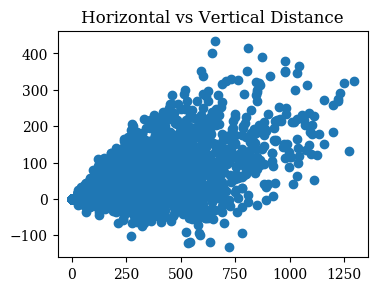

In [36]:
fig = plt.figure(figsize=(4, 3), dpi=100)
plt.scatter(covertype_subset['Horizontal_Distance_To_Hydrology'], covertype_subset['Vertical_Distance_To_Hydrology'])
plt.title('Horizontal vs Vertical Distance')
plt.show()

### *Exercise 1. Create the above scatter plot with colors corresponding to the first two cover types.*

In [16]:
# there are many ways of doing this

### Scatter plot matrix.

In [17]:
variable_names = list(covertype_subset.columns.values)

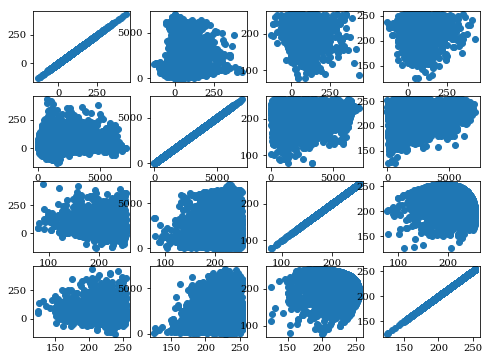

In [44]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(8, 6))
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ax.scatter(covertype_subset[variable_names[i + 4]], covertype_subset[variable_names[j + 4]])
plt.show()

# Principal component analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

In [19]:
from sklearn.decomposition import PCA

In [20]:
X = covertype_subset.iloc[:, 0:10].values  # only use the continuous variables
print(X.shape)

(5000, 10)


### Only fit two principal components for visualization. They explain only some of the variance in the data.

In [21]:
from sklearn.preprocessing import StandardScaler

### *Exercise 2. Try applying PCA without scaling the data.*

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)    

In [24]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.25523124 0.22766449]


In [25]:
scores = pca.transform(X)
print(scores.shape)

(5000, 2)


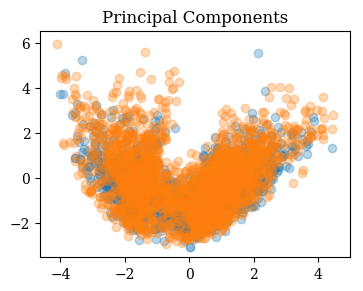

In [45]:
fig = plt.figure(figsize=(4, 3), dpi=100)
for i in range(1, 3):
    plt.scatter(scores[covertype_subset['Cover_Type'].values == i, 0], 
                scores[covertype_subset['Cover_Type'].values == i, 1], alpha=0.3)
plt.title('Principal Components')
plt.show()

### We want to actually interpret the components in terms of original variables. To do that, we can project each variable onto the two-dimensional space.

In [27]:
print(pca.components_.shape)
print(pca.components_)

(2, 10)
[[-0.09021709 -0.49595963  0.08946125 -0.06823681 -0.07374212 -0.11537988
   0.45691    -0.3784987  -0.60101152  0.03510066]
 [-0.38318708  0.14714254  0.51703285 -0.03795137  0.20712693 -0.39971477
  -0.35020526 -0.37095891  0.01764488 -0.31545905]]


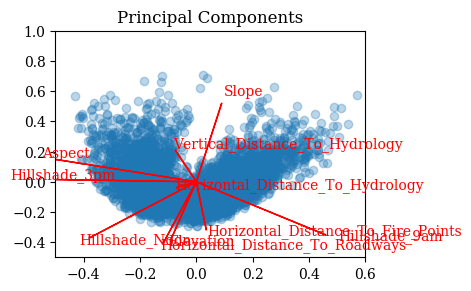

In [46]:
fig = plt.figure(figsize=(4, 3), dpi=100)
k1 = np.max(scores[:, 0]) - np.min(scores[:, 0])  # scaling the scores
k2 = np.max(scores[:, 1]) - np.min(scores[:, 1])
plt.scatter(scores[:, 0] / k1, scores[:, 1] / k2, alpha=0.3)
for variable_index in range(10):
    plt.arrow(0, 0, pca.components_[0, variable_index], pca.components_[1, variable_index], 
              color='red')
    plt.text(pca.components_[0, variable_index] * 1.1, pca.components_[1, variable_index] * 1.1, 
             variable_names[variable_index], color='red')
plt.title('Principal Components')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.5, 1)
plt.show()

### *Exercise 3. Can you make sense of the correlation between the variables?*